In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, losses, Input
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [8]:
class ConvolutionalAutoencoder(Model):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=()),
            MaxPooling2D((2, 2), padding='same'),
            Conv2D(8, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), padding='same'),
            Conv2D(8, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2), padding='same')
        ])

        self.decoder = tf.keras.Sequential([
            Conv2D(8, (3, 3), activation='relu', padding='same'),
            UpSampling2D((2, 2)),
            Conv2D(8, (3, 3), activation='relu', padding='same'),
            UpSampling2D((2, 2)),
            Conv2D(16, (3, 3), activation='relu'),
            UpSampling2D((2, 2)),
            Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    @tf.function
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
# Load Datasets
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)


(60000, 28, 28, 1)


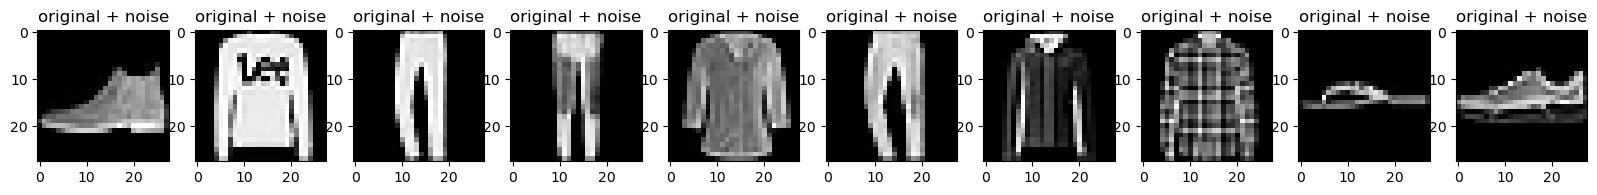

In [10]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [11]:
# Train Model
convolutional_autoencoder = ConvolutionalAutoencoder()
convolutional_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
convolutional_autoencoder.fit(x_train, x_train,
                        epochs=20,
                        shuffle=True,
                        validation_data=(x_test, x_test))


Epoch 1/20
1875/1875 [==============================] - 66s 34ms/step - loss: 0.0263 - val_loss: 0.0184
Epoch 2/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 3/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0163 - val_loss: 0.0164
Epoch 4/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 5/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 6/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 7/20
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 8/20
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 9/20
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 10/20
1875/1875 [==============================] - 66s 35m

In [12]:
# Model Summary
convolutional_autoencoder.encoder.summary()
convolutional_autoencoder.decoder.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

In [13]:
# Testing Model

encoded_imgs = convolutional_autoencoder.encoder(x_test).numpy()
decoded_imgs = convolutional_autoencoder.decoder(encoded_imgs).numpy()

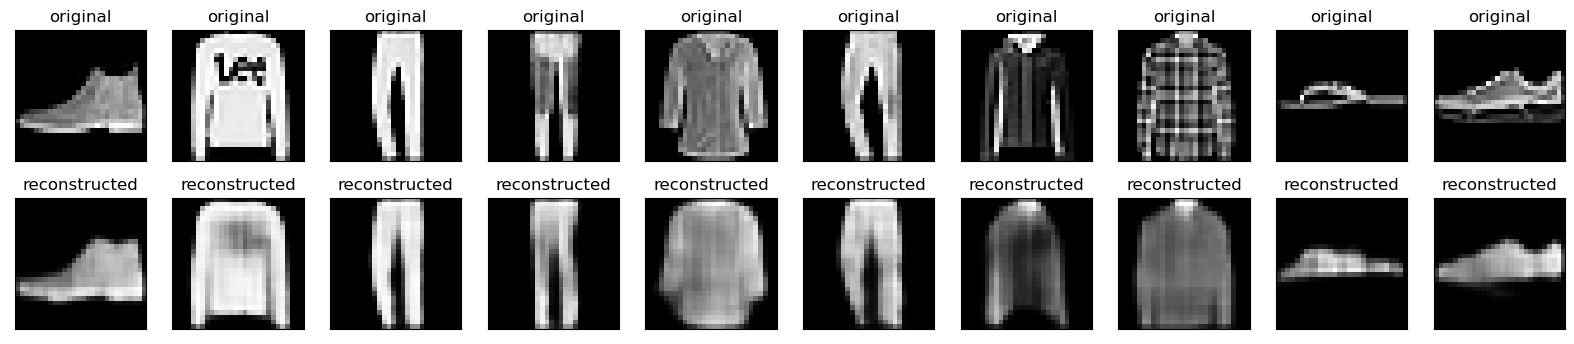

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()